In [1]:
import numpy as np
import pandas as pd
%pylab inline 
import h5py
from tqdm import tqdm
from sklearn import preprocessing
from sklearn import decomposition
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from scipy.sparse import load_npz, save_npz
import scipy.stats
import pandas as pd
import sklearn
import h5py
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import pickle
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import json, urllib
import plotly
plotly.tools.set_credentials_file(username='james20141606', api_key='L3zPyULntDsWb4XC4fGS')
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
cd ../

/home/chenxupeng/projects/mcm


In [132]:
table = pd.read_excel('problemCdata/ProblemCData.xlsx')

In [133]:
table

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.00000
1,ABICB,AZ,1961,0.00000
2,ABICB,AZ,1962,0.00000
3,ABICB,AZ,1963,0.00000
4,ABICB,AZ,1964,0.00000
5,ABICB,AZ,1965,0.00000
6,ABICB,AZ,1966,0.00000
7,ABICB,AZ,1967,0.00000
8,ABICB,AZ,1968,0.00000
9,ABICB,AZ,1969,0.00000


In [134]:
msn_code_for_network=['SOEGB','NUETB','HYTCB','WYTCB','GEEGB','NGEIB','CLEIB','PAEIB',
                     'GORCB','CLRCB','NGRCB','GECCB','NGCCB','NGICB','CLCCB','CLICB',
                      'NGACB','ESRCB','PARCB','ESCCB','PACCB','ESICB','PAICB','ESACB',
                      'PAACB','LOTCB',
                     'TEEIB','TERCB','TECCB','TEICB','TEACB']

In [135]:
def get_year_state_network_data(statename,year):
    '''
    input: statename year
    output:array , profile the network
    '''
    table_state = table[table['StateCode'] ==statename]
    table_state_year = table_state[table_state['Year']==year]
    net = np.ndarray([len(msn_code_for_network),])
    for i in range(len(msn_code_for_network)):
        a = np.array(table_state_year[table_state_year['MSN'] == \
                       msn_code_for_network[i]]['Data']).astype('float')[0]/1000.0
        net[i] = float('%.2f' %a )
    return net

In [136]:
value_ = get_year_state_network_data('AZ',2009)

In [99]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.urlopen(url)
energy_data = json.loads(response.read())
data_label = ['Solar','Nuclear','Hydro','Wind','Geothermal','Natural Gas','Coal',
              'Petroleum','Electricity Generation '+str(value_[-5]),'Residential '+str(value_[-4]),
              'Commercial '+str(value_[-3]),'Industrial '+str(value_[-2]),'Transportation '+str(value_[-1]),
              'Electricity energy loss '+str(value_[-6]),'End-use consumption '+str(value_[-1]+value_[-2]+value_[-3]+value_[-4])]
data_color = energy_data['data'][0]['node']['color'][:]
data_source = [0,1,2,3,4,5,6,7, 0,6,5,4, 5, 5, 6, 6, 5, 8, 7, 8, 7, 8, 7, 8, 7, 8, 9, 10,11,12]
data_target =[ 8,8,8,8,8,8,8,8, 9,9,9,10,10,11,10,11,12,9,9, 10,10,11,11,12,12,13,14,14,14,14]
data_value =list(value_[:-6])+[value_[-6],value_[-4],value_[-3],value_[-2],value_[-1]]

In [100]:
data_trace = dict(
    type='sankey',
    width = 1118,
    height = 2500,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 10,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data_label,
      color =  data_color
    ),
    link = dict(
      source =  data_source,
      target =  data_target,
      value =  data_value,
      color = data_color
  ))

layout =  dict(
    title = "Energy profile of Texas in 2009     (unit:Trillion)",
    #California (CA), Arizona (AZ), New Mexico (NM), and Texas (TX)
    font = dict(
      size = 8
    ),
    height=500,
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

In [ ]:
msn_code_for_network=['SOEGB','NUETB','HYTCB','WYTCB','GEEGB','NGEIB','CLEIB','PAEIB',
                     'GORCB','CLRCB','NGRCB','GECCB','NGCCB','NGICB','CLCCB','CLICB','NGACB',
                      'ESRCB', 'PARCB','ESCCB', 'PACCB','ESICB', 'PAICB','ESACB', 'PAACB','LOTCB', 
                     'TEEIB','TERCB','TECCB','TEICB','TEACB']

In [103]:
lines_for_network=['SOEGB','NUETB','HYTCB','WYTCB','GEEGB','NGEIB','CLEIB','PAEIB',
                          'CLRCB','NGRCB','GECCB','NGCCB','NGICB','CLCCB','CLICB','NGACB',
                      'ESRCB', 'PARCB','ESCCB', 'PACCB','ESICB', 'PAICB','ESACB', 'PAACB',
                      'LOTCB', 'TERCB','TECCB','TEICB','TEACB']

In [203]:
ridge_cons= {}
for i in range(4):
    ridge_cons[i] ={}
    for j in range(2):
        with h5py.File('ridge_cons') as f:
            ridge_cons[i][j] = f[str(i)+str(j)][:]

In [212]:
statename = ['AZ','CA','NM','TX']

In [204]:
ridge_cons[0][0][-1]

array([-0.73804142,  2.77159761,  4.00825426, -0.30754006, -0.19386565,
        3.9234379 ,  4.64313545, -0.0183418 , -0.77396681,  2.76433386,
       -1.58950517,  2.51843249,  2.58547802, -2.13453346,  0.79001334,
        2.43386751,  2.97126951,  0.52450849,  3.1322793 ,  0.71636381,
        2.71233888,  3.04570328, -0.54818256,  4.83201214,  5.82093116,
        5.85431814,  5.78702671,  5.86642254,  6.47264523])

In [205]:
ridge_cons[0][1][-1]

array([-1.96611286,  5.77056847,  4.1388398 , -1.23787436,  0.        ,
        5.58986695,  6.0027259 , -0.51082562,  0.        ,  3.565864  ,
       -3.21887582,  3.48981857,  2.90635446,  0.        ,  2.16676537,
        3.11484775,  4.71912368,  1.51292701,  4.60776681,  1.88555335,
        3.64335894,  4.05074092,  0.        ,  6.15504916,  6.26765585,
        5.9935374 ,  5.86391523,  5.33638357,  6.20176599])

In [347]:
array = np.exp(get_result(2,0)[40])
statenames = statename[3]
year = '2050'

In [348]:
# i lr lasso ridge   j  difference  train predict
#def draw(array,statename,year):
value_ = array
data_value = value_
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.urlopen(url)
energy_data = json.loads(response.read())
data_label = ['Solar','Nuclear','Hydro','Wind','Geothermal','Natural Gas','Coal',
              'Petroleum','Electricity Generation','Residential '+str(value_[-4]),
              'Commercial '+str(value_[-3]),'Industrial '+str(value_[-2]),'Transportation '+str(value_[-1]),
              'Electricity energy loss '+str(value_[-5]),'End-use consumption '+str(value_[-1]+value_[-2]+value_[-3]+value_[-4])]
data_color = energy_data['data'][0]['node']['color'][:]
data_source = [0,1,2,3,4,5,6,7, 6,5,4, 5, 5, 6, 6, 5, 8, 7, 8,  7, 8, 7, 8, 7, 8, 9, 10,11,12]
data_target =[ 8,8,8,8,8,8,8,8, 9,9,10,10,11,10,11,12,9,9, 10, 10,11,11,12,12,13,14,14,14,14]
data_trace = dict(
    type='sankey',
    width = 1118,
    height = 2500,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 10,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data_label,
      color =  data_color
    ),
    link = dict(
      source =  data_source,
      target =  data_target,
      value =  data_value,
      color = data_color
  ))

layout =  dict(
    title = 'Energy flow profile of '+ statenames+' in '+year+'     (unit:Trillion)',
    #California (CA), Arizona (AZ), New Mexico (NM), and Texas (TX)
    font = dict(
      size = 8
    ),
    height=500,
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

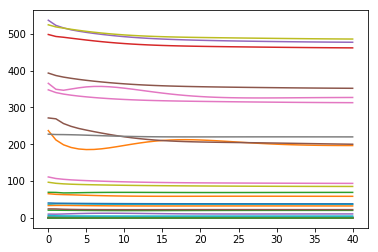

In [351]:
plt.plot(np.exp(get_result(2,0)))

In [213]:
# i lr lasso ridge   j  difference  train predict
value_ = ridge_cons[2][0][-1]
data_value = value_
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.urlopen(url)
energy_data = json.loads(response.read())
data_label = ['Solar','Nuclear','Hydro','Wind','Geothermal','Natural Gas','Coal',
              'Petroleum','Electricity Generation','Residential '+str(value_[-4]),
              'Commercial '+str(value_[-3]),'Industrial '+str(value_[-2]),'Transportation '+str(value_[-1]),
              'Electricity energy loss '+str(value_[-5]),'End-use consumption '+str(value_[-1]+value_[-2]+value_[-3]+value_[-4])]
data_color = energy_data['data'][0]['node']['color'][:]
data_source = [0,1,2,3,4,5,6,7, 6,5,4, 5, 5, 6, 6, 5, 8, 7, 8,  7, 8, 7, 8, 7, 8, 9, 10,11,12]
data_target =[ 8,8,8,8,8,8,8,8, 9,9,10,10,11,10,11,12,9,9, 10, 10,11,11,12,12,13,14,14,14,14]
data_trace = dict(
    type='sankey',
    width = 1118,
    height = 2500,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 10,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data_label,
      color =  data_color
    ),
    link = dict(
      source =  data_source,
      target =  data_target,
      value =  data_value,
      color = data_color
  ))

layout =  dict(
    title = "Mutate and profile of Arizona in 2009     (unit:Trillion)",
    #California (CA), Arizona (AZ), New Mexico (NM), and Texas (TX)
    font = dict(
      size = 8
    ),
    height=500,
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

In [274]:
from sklearn.linear_model import Lasso
def Model(model):
    global reg
    if model=='lr':
        reg = LinearRegression()
    elif model=='lasso':
        reg = Lasso()
    elif model=='ridge':
        reg = Ridge()
    elif model=='kr':
        reg = KernelRidge(alpha = 10000, kernel = 'polynomial',degree = 3)
    elif model=='knr':
        reg = neighbors.KNeighborsRegressor(n_neighbors=4, algorithm='brute')
    elif model=='rfr':
        reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=12, n_jobs=5)
    elif model=='gpr':
        kernel = 1.0 * DotProduct(sigma_0=1.0)**4
        reg = GaussianProcessRegressor(kernel = kernel, optimizer=None)
    elif model=='LSTM':
        reg = Sequential()
        reg.add(LSTM(4, input_shape=(1, 1)))
        reg.add(Dense(1))
        reg.compile(loss='mean_squared_error', optimizer='adam')
    #model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    return reg

modelname = ['lr','lasso','ridge','knr','rfr','gpr','LSTM']

x_train = {}
y_train ={}
with h5py.File('datasets') as f:
    for i in range(4):
        x_train[i] = f['x'+str(i)][:]
        y_train[i] = f['y'+str(i)][:]

In [283]:
def get_result(mod_ind,state_ind):
    regg = Model(modelname[mod_ind])
    regg.fit(ma.log(x_train[state_ind]),ma.log(y_train[state_ind]))
    predict_arr = np.ndarray([41,29])
    lastone = ma.log(x_train[0][-1]).reshape(1,-1)
    for i in range(41):
        lastone = regg.predict(lastone)
        predict_arr[i] = lastone
    return predict_arr

In [344]:
np.exp(get_result(2,0)[15])

array([  1.66567655e-01,   2.10230198e+02,   6.91467830e+01,
         8.32150242e-01,   1.00000000e+00,   2.10044337e+02,
         3.38868389e+02,   7.27976460e-01,   1.03960146e+00,
         3.67736811e+01,   5.43300629e-02,   3.24328202e+01,
         2.00250033e+01,   5.82154091e-02,   1.15699007e+01,
         2.24933191e+01,   9.61426690e+01,   3.50930240e+00,
         8.74775073e+01,   4.99688305e+00,   3.85550342e+01,
         5.87646569e+01,   1.00000000e+00,   4.68188129e+02,
         4.85553528e+02,   3.58743799e+02,   3.18121402e+02,
         2.20125663e+02,   4.91950663e+02])

In [ ]:
for i in range(6):
    for j in range(4):


In [298]:
prediction_arr = np.ndarray([4,41,29])
for i in range(4):
    prediction_arr[i] = get_result(0,i)

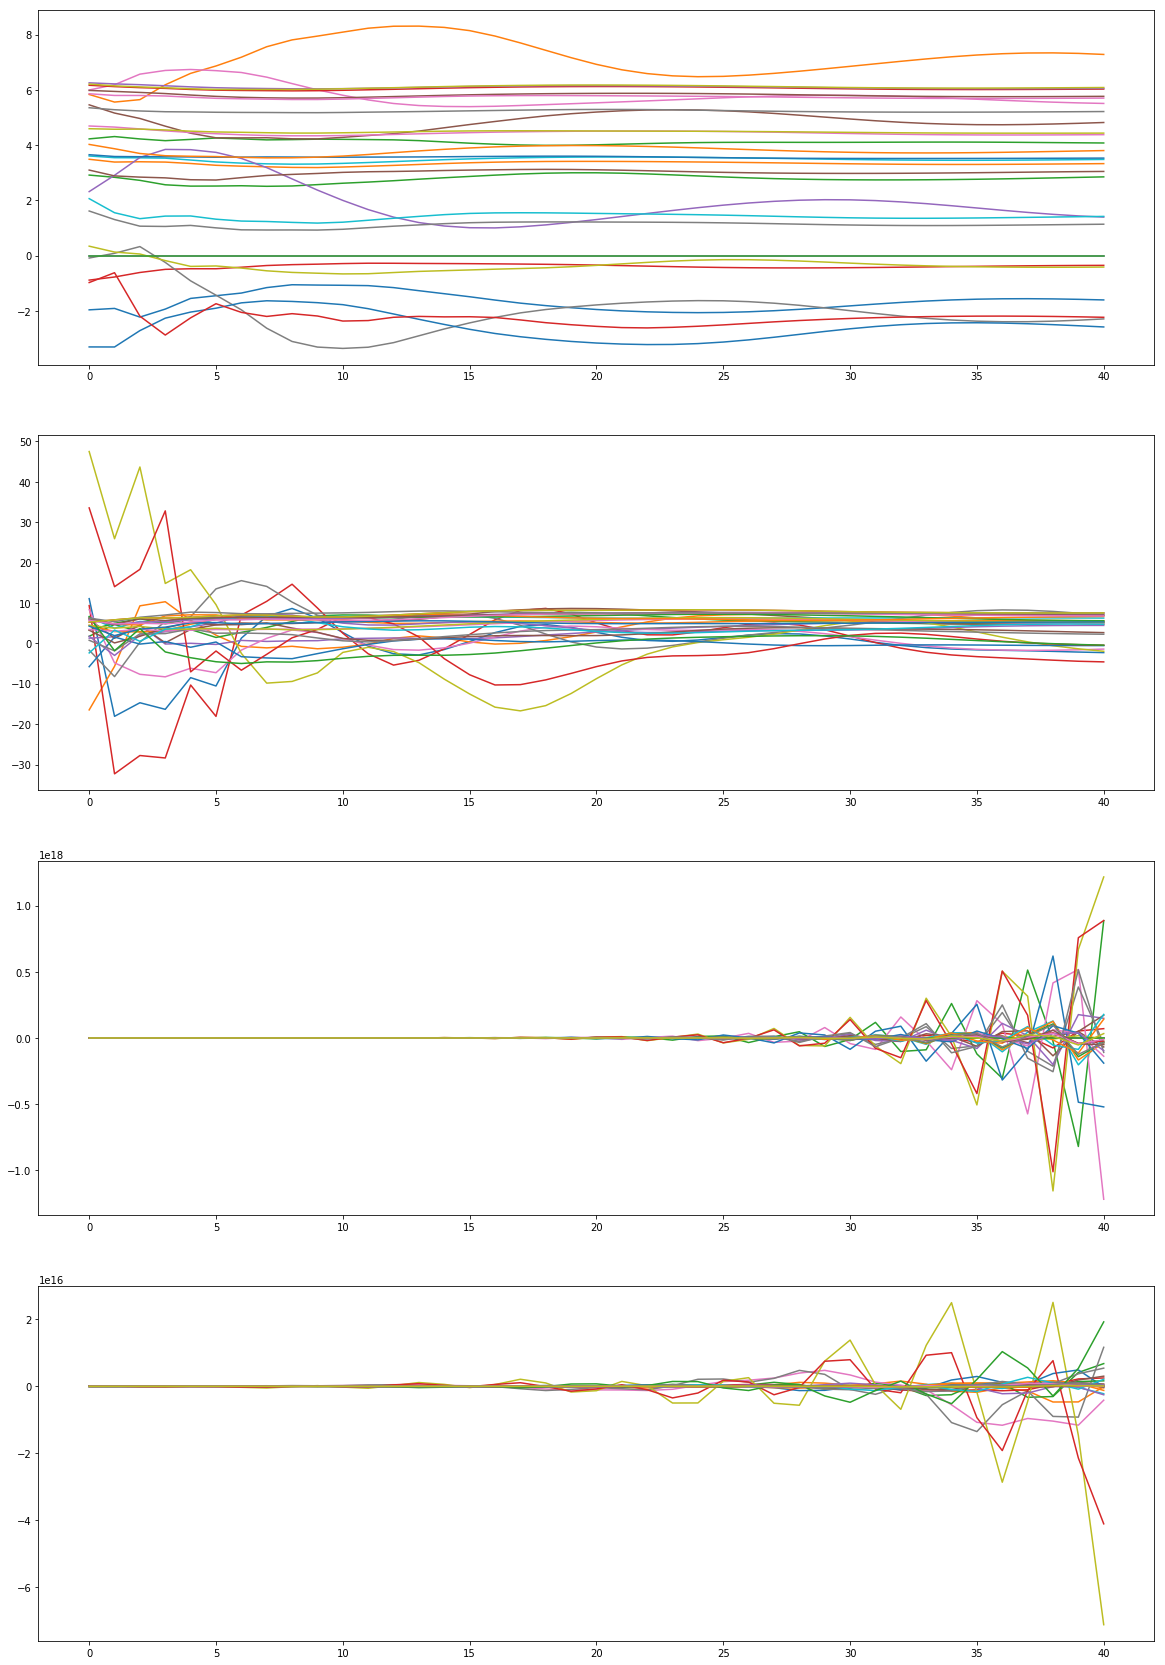

In [299]:
fig, ax = plt.subplots(4,figsize=(20,30))
for j in range(4):
    ax[j].plot(prediction_arr[j])

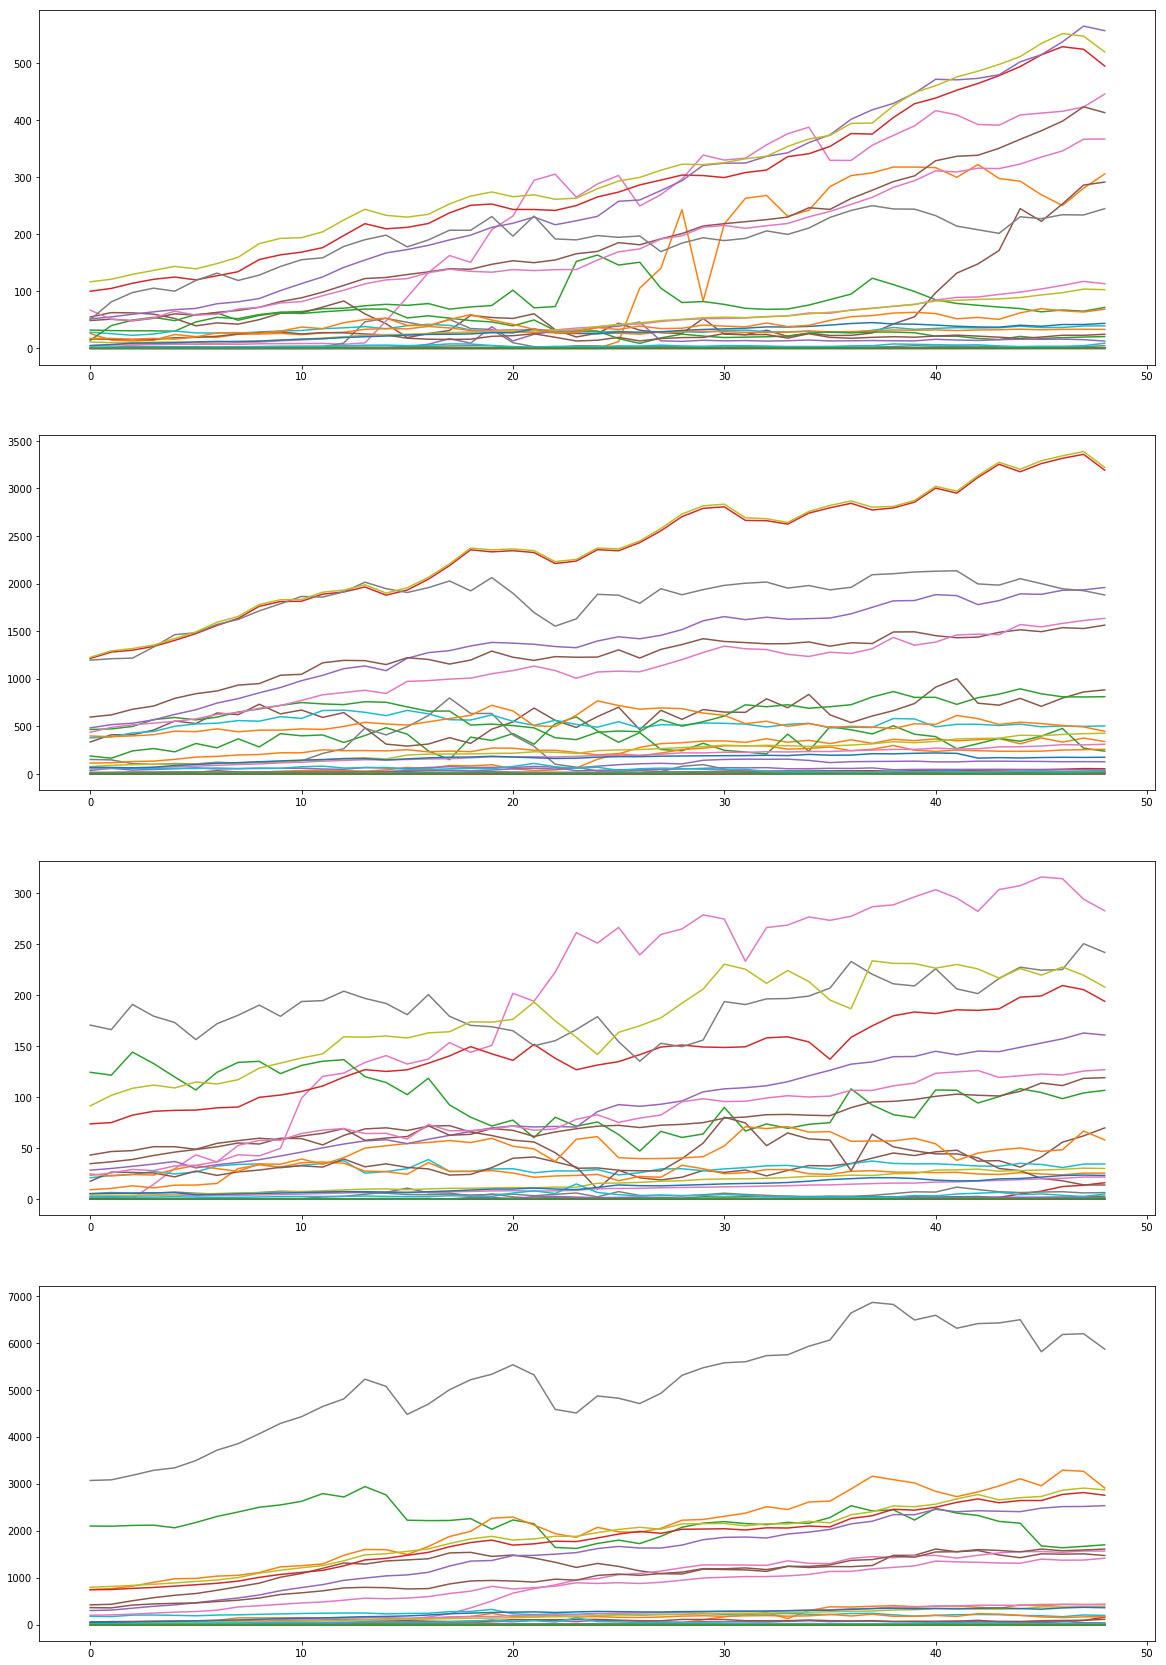

In [288]:
fig, ax = plt.subplots(4,figsize=(20,30))
for j in range(4):
    ax[j].plot(x_train[j])

In [294]:
x_train[0].shape

(49, 29)

In [327]:
drawarr = np.ndarray([8,29])
for i in range(4):
    drawarr[i*2] = (x_train[i][-1,:] - x_train[i][0,:])/49.*16.+x_train[i][-1,:]
    drawarr[i*2+1] = (x_train[i][-1,:] - x_train[i][0,:])/49.*41.+x_train[i][-1,:]

In [303]:
value_

array([-0.58388881,  2.24401352,  3.31722649, -0.22259181, -0.20101909,
        3.09713356,  3.7731857 ,  0.13402008, -0.7515097 ,  2.27438382,
       -1.23115559,  2.15535858,  2.19309946, -1.69456846,  0.6790843 ,
        1.91414033,  2.49306921,  0.38228379,  2.54608541,  0.60667905,
        2.22677978,  2.4922243 , -0.49343644,  4.06005412,  4.76780795,
        4.86094658,  4.81101675,  4.89647483,  5.2841338 ])

In [309]:
draw(drawarr[0],statename[0],'2025')

In [416]:
beta_op = h5py.File('beta_')['beta'][:]

In [419]:
mutlist = [7,17,19,21,23]
mut_matrix = np.ones([49,29])
for i in mutlist:
    mut_matrix[:,i] = np.repeat(0.8,49) 

In [420]:
mut = {}
for i in range(4):
    mut[i] = np.multiply(x_train[i],mut_matrix)

In [431]:
reg = Model(2)

In [432]:
pred_mut = {}
for i in range(4):
    reg.fit(x_train[i],y_train[i])
    pred_mut[i] = reg.predict(mut[i])

In [433]:
change_ = {}
for i in range(4):
    change_[i] = pred_mut[i] - y_train[i]

In [466]:
ratio = change_[1]/y_train[1]
(np.multiply(ratio[0],value_)[ind[0]]).sum()/(value_[ind[0]].sum())

199.03862231583071

In [467]:
ratio[0]

array([             inf,   3.21970658e+03,   2.68279131e-01,
                    inf,   3.79606501e+02,  -2.08037483e+00,
                    inf,  -1.85698411e+01,  -1.50945303e+02,
        -2.69778480e+00,              inf,  -8.95254103e-02,
        -5.84907200e+00,  -1.33916912e+03,  -6.05237836e+00,
        -6.70018116e+00,  -3.97230078e+00,  -5.80537544e+00,
         3.13696720e+00,  -1.17537737e+01,  -4.50922516e+00,
         9.66269412e+00,   1.79963688e+01,   1.47011146e+00,
         1.21999735e+00,  -1.49943040e+00,   1.31491462e+00,
         7.65618338e-01,   1.44610387e+00])

In [453]:
ind = ~np.isinf(ratio)
ind.shape

(49, 29)

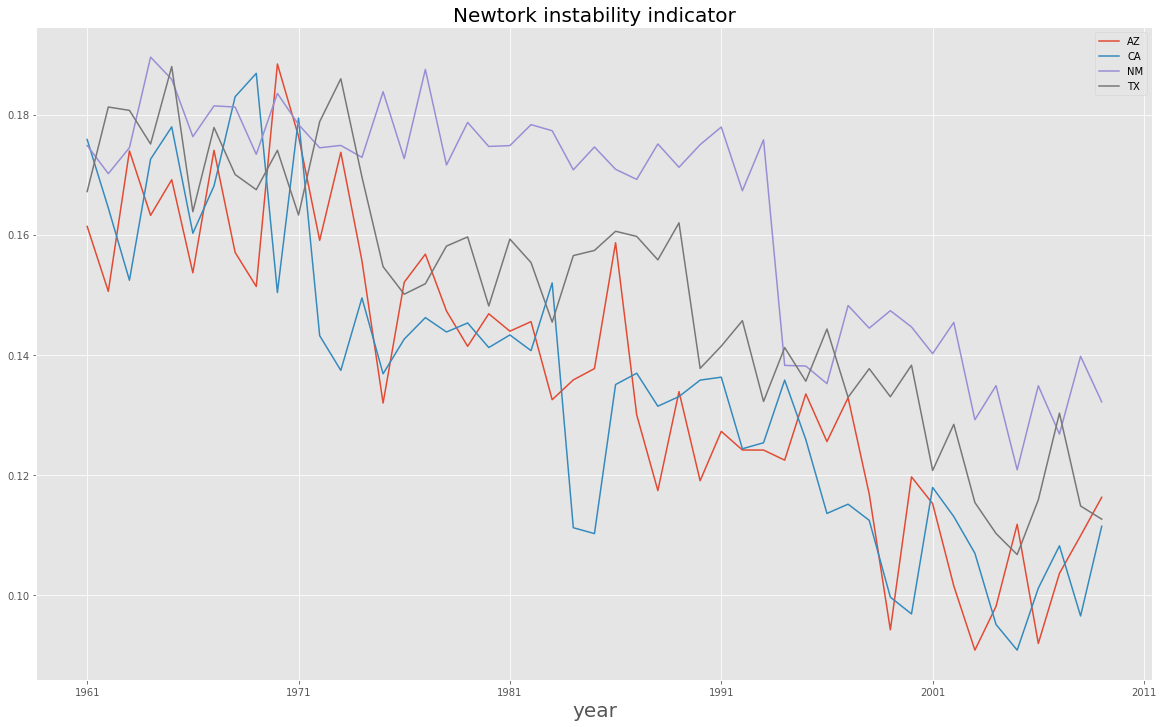

In [481]:
fig, ax = plt.subplots(1,figsize=(20,12))

labels = statename
for y_arr, label in zip(stable_arr, labels):
    ax.plot(y_arr, label=label)
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(6):
    labels[i+1] = str(1961+10*i)
ax.set_xticklabels(labels,fontsize=10)
ax.set_title('Newtork instability indicator',fontsize=20)
ax.set_xlabel('year',fontsize=20)
plt.legend()
plt.show()

In [414]:
year_25

[0.07895256, 0.09768442, 0.12016385, 0.09189806]

In [415]:
year_50

[0.03435256, 0.05032442, 0.07216385, 0.04479806]

In [8]:
import numpy as np
plotly.tools.set_credentials_file(username='james20141606', api_key='L3zPyULntDsWb4XC4fGS')
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [2]:
G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

In [6]:
edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))
for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

In [9]:
for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

AttributeError: 'Graph' object has no attribute 'adjacency_list'